# Data Modeling

## Data Modeling

### Importing libraries and load the datasets

In [1]:
# Importing libraries
import datetime
from datetime import datetime
import pandas as pd
from openpyxl import Workbook
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# Load all the datasets
df = pd.read_excel(r"..\..\data\dataModeling\dataModeling_DimsumTJOEAN.xlsx")

In [3]:
df.head(3)

,DATE,Shumai 30 Pcs,Shumai 20 Pcs,Shumai 10 Pcs,Chicken Lumpia 10 Pcs
0,2021-01,92,32,35,0
1,2021-02,101,35,30,59
2,2021-03,57,15,25,93


In [4]:
df.tail(3)

,DATE,Shumai 30 Pcs,Shumai 20 Pcs,Shumai 10 Pcs,Chicken Lumpia 10 Pcs
31,2023-09,1,4,0,0
32,2023-11,1,0,1,0
33,2023-12,0,6,0,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATE                   34 non-null     object
 1   Shumai 30 Pcs          34 non-null     int64 
 2   Shumai 20 Pcs          34 non-null     int64 
 3   Shumai 10 Pcs          34 non-null     int64 
 4   Chicken Lumpia 10 Pcs  34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [6]:
# Convert 'DATE' into datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   34 non-null     datetime64[ns]
 1   Shumai 30 Pcs          34 non-null     int64         
 2   Shumai 20 Pcs          34 non-null     int64         
 3   Shumai 10 Pcs          34 non-null     int64         
 4   Chicken Lumpia 10 Pcs  34 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.5 KB


In [8]:
df.head(3)

,DATE,Shumai 30 Pcs,Shumai 20 Pcs,Shumai 10 Pcs,Chicken Lumpia 10 Pcs
0,2021-01-01,92,32,35,0
1,2021-02-01,101,35,30,59
2,2021-03-01,57,15,25,93


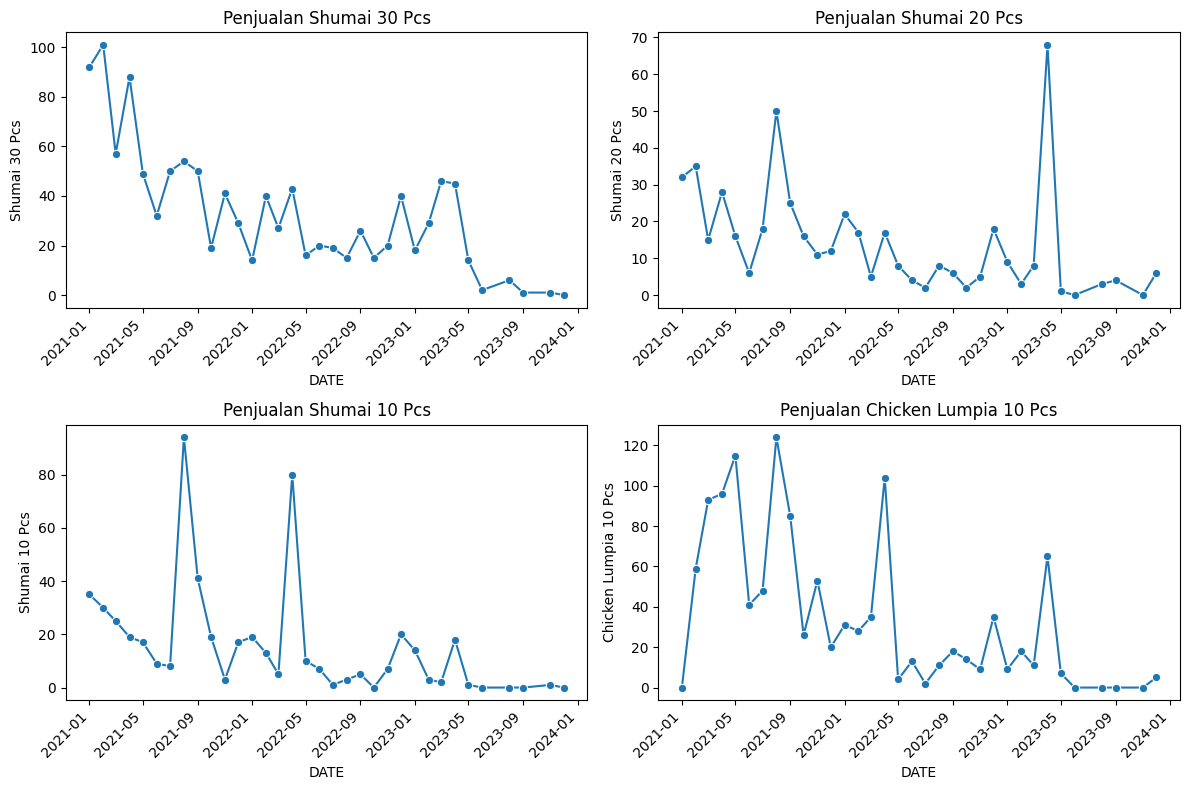

In [9]:
# Buat figure dan subplot menggunakan loop
# fig, axes = plt.subplots(2, 2, figsize=(30, 12))
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Daftar kolom untuk plot
columns_to_plot = ['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']

# Judul plot
plt.title('Tjoeans Sales')

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    row_index = i // 2
    col_index = i % 2
    g = sns.lineplot(data=df, x='DATE', y=column, ax=axes[row_index, col_index], palette='mako', marker='o')
    g.set_xticks(ticks = g.get_xticks(), labels = g.get_xticklabels(), rotation = 45, ha = 'right')
    # g.set_xlim(plt.xlim(pd.Timestamp('2020-12'), pd.Timestamp('2023-12')))
    '''g.set_xticks(['2021-01', '2021-06', '2021-12',
                  '2022-01', '2022-06', '2022-12',
                  '2023-01', '2023-06', '2023-12'])'''
    axes[row_index, col_index].set_title(f'Penjualan {column}')

# sns.set_theme(style='white')
plt.tight_layout()
plt.show()

In [10]:
# Sales Diff

salesColumns = ['Shumai 10 Pcs', 'Shumai 20 Pcs', 'Shumai 30 Pcs', 'Chicken Lumpia 10 Pcs']
diffSalesColumns = ['Shumai 10 Pcs Diff', 'Shumai 20 Pcs Diff', 'Shumai 30 Pcs Diff', 'Chicken Lumpia 10 Pcs Diff']

for i, col_A in enumerate(salesColumns):
     for j, col_B in enumerate(diffSalesColumns):
         df[col_B] = df[col_A].diff()
         df[col_B] = df[col_A].fillna(0)

df.head()

,DATE,Shumai 30 Pcs,Shumai 20 Pcs,Shumai 10 Pcs,Chicken Lumpia 10 Pcs,Shumai 10 Pcs Diff,Shumai 20 Pcs Diff,Shumai 30 Pcs Diff,Chicken Lumpia 10 Pcs Diff
0,2021-01-01,92,32,35,0,0,0,0,0
1,2021-02-01,101,35,30,59,59,59,59,59
2,2021-03-01,57,15,25,93,93,93,93,93
3,2021-04-01,88,28,19,96,96,96,96,96
4,2021-05-01,49,16,17,115,115,115,115,115


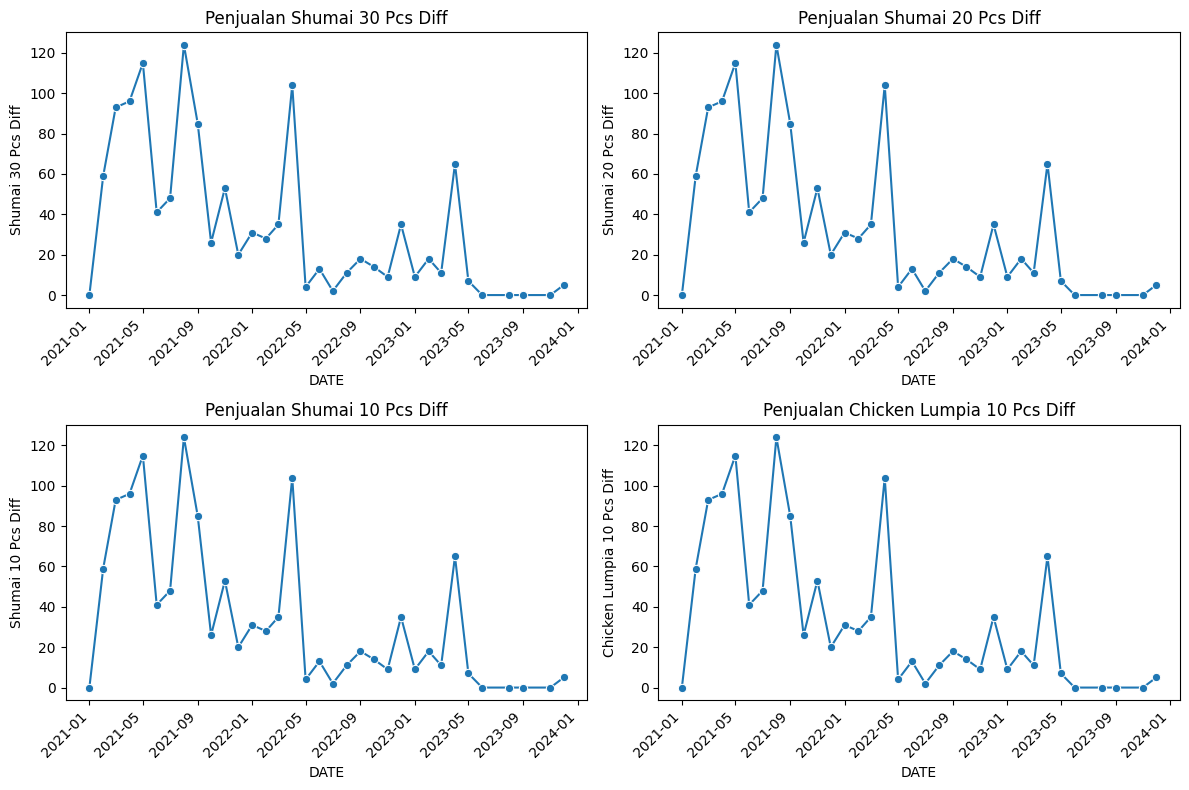

In [11]:
# Buat figure dan subplot menggunakan loop
# fig, axes = plt.subplots(2, 2, figsize=(30, 12))
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Daftar kolom untuk plot
columns_to_plot = ['Shumai 30 Pcs Diff', 'Shumai 20 Pcs Diff', 'Shumai 10 Pcs Diff', 'Chicken Lumpia 10 Pcs Diff']

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    row_index = i // 2
    col_index = i % 2
    g = sns.lineplot(data=df, x='DATE', y=column, ax=axes[row_index, col_index], palette='mako', marker='o')
    g.set_xticks(ticks = g.get_xticks(), labels = g.get_xticklabels(), rotation = 45, ha = 'right')
    # g.set_xlim(plt.xlim(pd.Timestamp('2020-12'), pd.Timestamp('2023-12')))
    '''g.set_xticks(['2021-01', '2021-06', '2021-12',
                  '2022-01', '2022-06', '2022-12',
                  '2023-01', '2023-06', '2023-12'])'''
    axes[row_index, col_index].set_title(f'Penjualan {column}')

# sns.set_theme(style='white')
plt.tight_layout()
plt.show()

In [12]:
supervised_data = df.drop(['DATE','Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
supervised_data.head()

,Shumai 10 Pcs Diff,Shumai 20 Pcs Diff,Shumai 30 Pcs Diff,Chicken Lumpia 10 Pcs Diff
0,0,0,0,0
1,59,59,59,59
2,93,93,93,93
3,96,96,96,96
4,115,115,115,115


In [13]:
diffSalesColumns = ['Shumai 10 Pcs Diff', 'Shumai 20 Pcs Diff', 'Shumai 30 Pcs Diff', 'Chicken Lumpia 10 Pcs Diff']

for cols in diffSalesColumns:
    for month in range(1, len(supervised_data)+1):
        col_name = f"{cols} Month {month}"
        supervised_data[col_name] = supervised_data[cols].shift(i)
        supervised_data[col_name] = supervised_data[col_name].fillna(0).astype('int64')

supervised_data.info();
supervised_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Columns: 140 entries, Shumai 10 Pcs Diff to Chicken Lumpia 10 Pcs Diff Month 34
dtypes: int64(140)
memory usage: 37.3 KB


,Shumai 10 Pcs Diff,Shumai 20 Pcs Diff,Shumai 30 Pcs Diff,Chicken Lumpia 10 Pcs Diff,Shumai 10 Pcs Diff Month 1,Shumai 10 Pcs Diff Month 2,Shumai 10 Pcs Diff Month 3,Shumai 10 Pcs Diff Month 4,Shumai 10 Pcs Diff Month 5,Shumai 10 Pcs Diff Month 6,...,Chicken Lumpia 10 Pcs Diff Month 25,Chicken Lumpia 10 Pcs Diff Month 26,Chicken Lumpia 10 Pcs Diff Month 27,Chicken Lumpia 10 Pcs Diff Month 28,Chicken Lumpia 10 Pcs Diff Month 29,Chicken Lumpia 10 Pcs Diff Month 30,Chicken Lumpia 10 Pcs Diff Month 31,Chicken Lumpia 10 Pcs Diff Month 32,Chicken Lumpia 10 Pcs Diff Month 33,Chicken Lumpia 10 Pcs Diff Month 34
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,59,59,59,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,93,93,93,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,96,96,96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115,115,115,115,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59


In [14]:
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaler.fit(supervised_data)
# supervised_data = scaler.transform(supervised_data)

In [15]:
X = supervised_data.iloc[:, 5:]
y = supervised_data.iloc[:, 0:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


  5%|▍         | 2/42 [00:00<00:03, 11.89it/s]

BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


 19%|█▉        | 8/42 [00:00<00:02, 14.70it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 24%|██▍       | 10/42 [00:00<00:03,  9.44it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


 60%|█████▉    | 25/42 [00:01<00:00, 20.42it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


 67%|██████▋   | 28/42 [00:01<00:00, 15.63it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 27.


 93%|█████████▎| 39/42 [00:02<00:00, 14.55it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


100%|██████████| 42/42 [00:04<00:00,  9.97it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 5) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,1.09,-1.03,61.12,0.03
KernelRidge,1.09,-0.94,58.33,0.05
DummyRegressor,1.06,-0.21,47.07,0.03
XGBRegressor,1.05,-0.17,45.09,1.38
ExtraTreeRegressor,1.05,-0.15,44.74,0.05
DecisionTreeRegressor,1.05,-0.12,44.01,0.05
ExtraTreesRegressor,1.05,-0.11,43.89,0.35
KNeighborsRegressor,1.05,-0.05,42.64,0.25
OrthogonalMatchingPursuit,1.05,-0.01,41.73,0.03


In [16]:
# ExtraTreesRegressor
X = supervised_data.iloc[:, 5:]
y = supervised_data.iloc[:, 0:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
reg = ExtraTreesRegressor(n_estimators=1000, random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print()
print("X_test:")
print(X_test)
print(f'Type of X_test: {type(X_test)}')
print(f'Type of y_pred: {type(y_pred)}')
print(f'Score X_train & y_train: {reg.score(X_train, y_train)}')
print(f'Score X_test & y_test: {reg.score(X_test, y_test)}')
print(f'Predictive value: {y_pred}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')

Shape of X_train: (27, 135)
Shape of X_test: (7, 135)
Shape of y_train: (27, 5)
Shape of y_test: (7, 5)

X_test:
    Shumai 10 Pcs Diff Month 2  Shumai 10 Pcs Diff Month 3  \
18                         104                         104   
23                          18                          18   
25                           9                           9   
1                            0                           0   
7                          115                         115   
3                            0                           0   
11                          85                          85   

    Shumai 10 Pcs Diff Month 4  Shumai 10 Pcs Diff Month 5  \
18                         104                         104   
23                          18                          18   
25                           9                           9   
1                            0                           0   
7                          115                         115   
3                 

In [17]:
# Membuat variabel month
df['MONTH'] = df.index + 1
print(f'After MONTH inserted')
df.head()

# Menghapus variabel DATE
df.drop(columns='DATE', axis=1, inplace=True)

# Memindahkan variabel MONTH ke depan
df = df.iloc[:, [4,0,1,2,3]]
print(f'After DATE removed')
df.head()

After MONTH inserted
After DATE removed


,Shumai 10 Pcs Diff,Shumai 30 Pcs,Shumai 20 Pcs,Shumai 10 Pcs,Chicken Lumpia 10 Pcs
0,0,92,32,35,0
1,59,101,35,30,59
2,93,57,15,25,93
3,96,88,28,19,96
4,115,49,16,17,115


In [18]:
target = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
target.index[2]

2

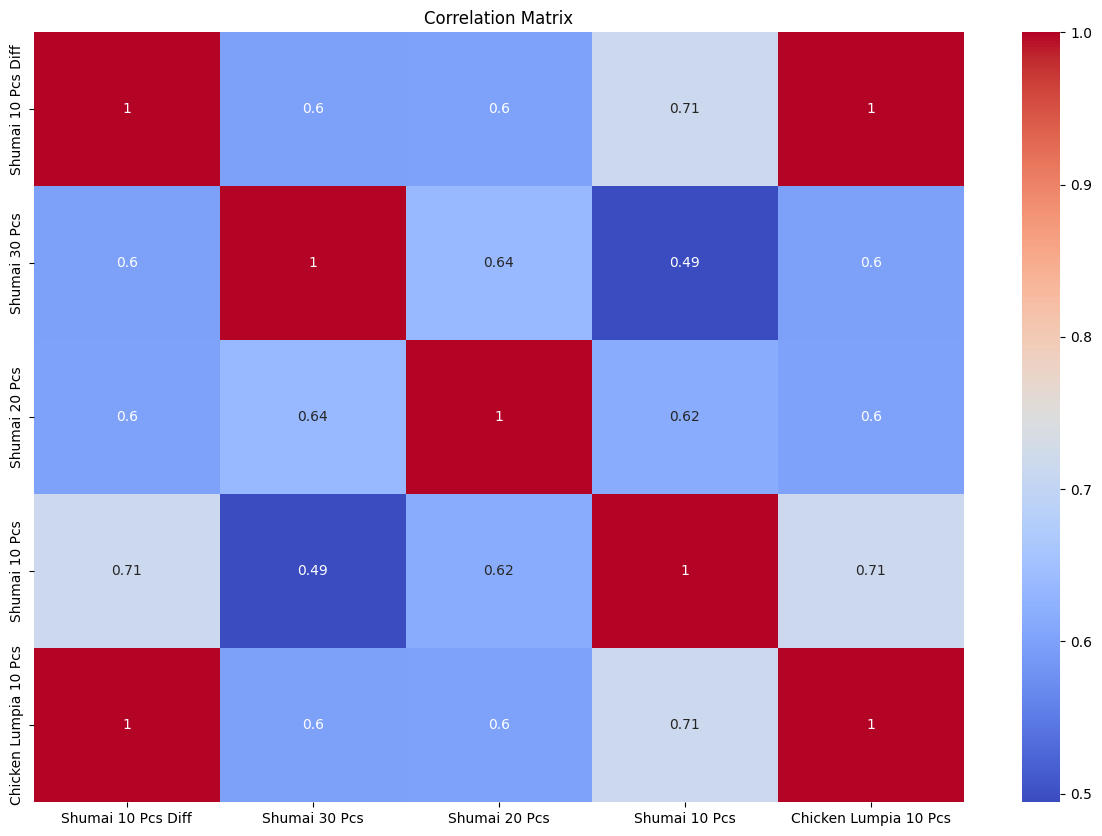

In [19]:
corr = df.corr()
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# LazyRegressor
# X = df.drop(columns=['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
X = df.iloc[:, [0]]
y = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

 10%|▉         | 4/42 [00:00<00:01, 36.18it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 69%|██████▉   | 29/42 [00:00<00:00, 61.27it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
LarsCV model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
NuSVR model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
Orthogo

 86%|████████▌ | 36/42 [00:00<00:00, 40.26it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.


100%|██████████| 42/42 [00:01<00:00, 39.76it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (27, 4) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,0.42,0.52,18.45,0.01
LinearRegression,0.42,0.52,18.45,0.01
Lars,0.42,0.52,18.45,0.01
Ridge,0.41,0.51,18.69,0.01
RidgeCV,0.41,0.51,18.69,0.01
Lasso,0.37,0.47,19.11,0.01
LassoLars,0.37,0.47,19.11,0.01
KNeighborsRegressor,0.35,0.46,20.55,0.01
RANSACRegressor,0.27,0.39,22.10,0.06


In [21]:
X = df.iloc[:, [0]]
y = df.iloc[:, 1:]
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   Shumai 10 Pcs Diff
0                   0
1                  59
2                  93
3                  96
4                 115
   Shumai 30 Pcs  Shumai 20 Pcs  Shumai 10 Pcs  Chicken Lumpia 10 Pcs
0             92             32             35                      0
1            101             35             30                     59
2             57             15             25                     93
3             88             28             19                     96
4             49             16             17                    115
(34, 1)
(34, 4)


In [22]:
# ExtraTreesRegressor
# X = df.drop(columns=['DATE', 'Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
X = df.iloc[:, [0]]
y = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
reg = ExtraTreesRegressor(n_estimators=1000, random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print()
print("X_test:")
print(X_test)
print(f'Type of X_test: {type(X_test)}')
print(f'Type of y_pred: {type(y_pred)}')
print(f'Score X_train & y_train: {reg.score(X_train, y_train)}')
print(f'Score X_test & y_test: {reg.score(X_test, y_test)}')
print(f'Predictive value: {y_pred}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Shape of X_train: (27, 1)
Shape of X_test: (7, 1)
Shape of y_train: (27, 4)
Shape of y_test: (7, 4)

X_test:
    Shumai 10 Pcs Diff
18                   2
23                  35
25                  18
1                   59
7                  124
3                   96
11                  20
Type of X_test: <class 'pandas.core.frame.DataFrame'>
Type of y_pred: <class 'numpy.ndarray'>
Score X_train & y_train: 0.7868586252992572
Score X_test & y_test: 0.2929069395891001
Predictive value: [[ 18.2176   7.8992   8.5888   1.984 ]
 [ 27.       5.       5.      35.    ]
 [ 26.       6.       5.      18.    ]
 [ 43.06    40.355   10.725   59.18  ]
 [ 49.      16.      17.     115.    ]
 [ 53.486   15.502   38.805   95.761 ]
 [ 24.229    8.53     8.542   20.024 ]]
MAE: 12.671978571428573
MSE: 481.1547688871429
RMSE: 21.935240342588976


In [23]:
prediction = reg.predict([[35]])
prediction

array([[27.,  5.,  5., 35.]])

In [24]:
next_month_data = pd.DataFrame({'DATE': ['2024-01']})
next_month_prediction = reg.predict(next_month_data)
next_month_prediction[0]

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DATE
Feature names seen at fit time, yet now missing:
- Shumai 10 Pcs Diff
